** # Bellabeat Case Study **
 
 Bellabeat makes smart health products. Sren utilized her artistic experience to make technology that encourages women worldwide. Bellabeat empowers women by collecting data on movement, sleep, stress, and reproductive health. Bellabeat was started in 2013 and has swiftly become a tech-driven women's health firm.
Bellabeat has various offices and products by 2016. Bellabeat items are sold via an increasing number of online shops in addition to their website. The corporation invests in radio, billboards, print, and TV, but concentrates on internet marketing. Bellabeat spends year-round in Google Search, Facebook, Instagram, and Twitter. Bellabeat also uses YouTube and Google Display Network advertisements to promote marketing activities.
Sren understands Bellabeat's customer data will uncover business prospects. She requested the marketing analytics team to evaluate smart device use data for a Bellabeat product to see how people use smart devices. Using this information, she wants high-level suggestions for Bellabeat's marketing plan.


# ASK
**Business Task**
Analyse data would reveal more opportunities for growth in the company

**Stakeholders**

* Urška Sršen - Bellabeat cofounder and Chief Creative Officer
* Sando Mur - Bellabeat cofounder and key member of Bellabeat executive team
* Bellabeat Marketing Analytics team



# Prepare

**Data Location**

This Kaggle data collection consists of the fitness trackers of thirty fitbit users. Thirty eligible Fitbit users volunteered to the submission of their personal tracker data, which included minute-by-minute output for physical activity, heart rate, and sleep monitoring. It provides data about the user's daily activities, steps, and heart rate, which may be utilized to investigate their behaviors.

**Data Protection**
The dataset's metadata confirms it's open-source. The owner has devoted the work to the public domain by renouncing all copyright rights worldwide, including related and neighboring rights. Without permission, you may copy, edit, distribute, and perform the work.

**Data**
The data is delivered in a format known as CSV. Fitbit captures a variety of quantitative data, which is represented by each document. Because each row represents one time point for each subject, the data are regarded to be lengthy due to the fact that each subject will have numerous rows of data for themselves. Because the data is recorded by day and time, each each user has their own unique ID and rows of data.



# Process

R will be used for the analysis of the data since it will be necessary to do extensive visualisation throughout the study.

Packages to be installed 
* tidyverse
* lubridate
* ggplot
* here
* skimr
* janitor
* ggpubr
* ggrepel


In [52]:
install.packages("tidyverse")
install.packages("lubridate")
install.packages("ggplot2")
install.packages("here")
install.packages("skimr")
install.packages("janitor")
install.packages("ggpubr")
install.packages("ggrepel")

library("tidyverse")
library("lubridate")
library("ggplot2")
library("here")
library("skimr")
library("janitor")
library("ggpubr")
library("ggrepel")
library("tidymodels")
library("readr")




Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

here() starts at /kaggle/working


Attaching package: ‘janitor’


The following objects are masked from ‘package:stats’:

    chisq.test, fisher.test


── Attaching packages ────────────────────────────────────── tidymodels 1.0.0 ──

✔ broom        1.0.1     ✔ rsample      1.1.0
✔ dials        1.0.0     ✔ tune         1.0.0
✔ infer   

In [4]:
#STEP TWO: COLLECT DATA
getwd()
setwd("/kaggle/working")

[1] "/kaggle/working"

In [54]:
library("readr")

dailyActivity <- read_csv("../input/fitbit/Fitabase Data 4.12.16-5.12.16/dailyActivity_merged.csv")
dailyCalories <- read_csv("../input/fitbit/Fitabase Data 4.12.16-5.12.16/dailyCalories_merged.csv")
dailyIntensities <- read_csv("../input/fitbit/Fitabase Data 4.12.16-5.12.16/dailyIntensities_merged.csv")
dailySteps <- read_csv("../input/fitbit/Fitabase Data 4.12.16-5.12.16/dailySteps_merged.csv")
heartrate <- read_csv("../input/fitbit/Fitabase Data 4.12.16-5.12.16/heartrate_seconds_merged.csv")
hourlyCalories <- read_csv("../input/fitbit/Fitabase Data 4.12.16-5.12.16/hourlyCalories_merged.csv")
hourlyIntensities <- read_csv("../input/fitbit/Fitabase Data 4.12.16-5.12.16/hourlyIntensities_merged.csv")
hourlySteps <- read_csv("../input/fitbit/Fitabase Data 4.12.16-5.12.16/hourlySteps_merged.csv")
minuteCaloriesNarrow <- read_csv("../input/fitbit/Fitabase Data 4.12.16-5.12.16/minuteCaloriesNarrow_merged.csv")
minuteCaloriesWide <- read_csv("../input/fitbit/Fitabase Data 4.12.16-5.12.16/minuteCaloriesWide_merged.csv")
minuteIntensitiesNarrow <- read_csv("../input/fitbit/Fitabase Data 4.12.16-5.12.16/minuteIntensitiesNarrow_merged.csv")
minuteIntenisitiesWide <- read_csv("../input/fitbit/Fitabase Data 4.12.16-5.12.16/minuteIntensitiesWide_merged.csv")
minuteMETnarrow <- read_csv("../input/fitbit/Fitabase Data 4.12.16-5.12.16/minuteMETsNarrow_merged.csv")
minuteSleep <- read_csv("../input/fitbit/Fitabase Data 4.12.16-5.12.16/minuteMETsNarrow_merged.csv")
minuteStepsNarrow <- read_csv("../input/fitbit/Fitabase Data 4.12.16-5.12.16/minuteStepsNarrow_merged.csv")
minuteStepsWide <- read_csv("../input/fitbit/Fitabase Data 4.12.16-5.12.16/minuteStepsWide_merged.csv")
sleepDay_merged <- read_csv("../input/fitbit/Fitabase Data 4.12.16-5.12.16/sleepDay_merged.csv")
weightLogInfo <- read_csv("../input/fitbit/Fitabase Data 4.12.16-5.12.16/weightLogInfo_merged.csv")

Rows: 940 Columns: 15
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr  (1): ActivityDate
dbl (14): Id, TotalSteps, TotalDistance, TrackerDistance, LoggedActivitiesDi...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.
Rows: 940 Columns: 3
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (1): ActivityDay
dbl (2): Id, Calories

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.
Rows: 940 Columns: 10
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (1): ActivityDay
dbl (9): Id, SedentaryMinutes, LightlyActiveMinutes, FairlyActiveMinutes, Ve...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the col

In [15]:
#STEP THREE: WRANGLE DATA AND COMBINE INTO ONE SINGLE FILE 
#Compare all column names in the data sets
colnames(dailyActivity)
colnames(sleepDay_merged)
# Inspect the data frames and look for incongruities
str(dailyActivity)
str(sleepDay_merged)

#Note that both datasets have the 'Id' field - this can be used to merge the datasets.

## Understanding some summary statistics


[1] "Id"                       "ActivityDate"            
 [3] "TotalSteps"               "TotalDistance"           
 [5] "TrackerDistance"          "LoggedActivitiesDistance"
 [7] "VeryActiveDistance"       "ModeratelyActiveDistance"
 [9] "LightActiveDistance"      "SedentaryActiveDistance" 
[11] "VeryActiveMinutes"        "FairlyActiveMinutes"     
[13] "LightlyActiveMinutes"     "SedentaryMinutes"        
[15] "Calories"

[1] "Id"                 "SleepDay"           "TotalSleepRecords" 
[4] "TotalMinutesAsleep" "TotalTimeInBed"

spec_tbl_df [940 × 15] (S3: spec_tbl_df/tbl_df/tbl/data.frame)
 $ Id                      : num [1:940] 1.5e+09 1.5e+09 1.5e+09 1.5e+09 1.5e+09 ...
 $ ActivityDate            : chr [1:940] "4/12/2016" "4/13/2016" "4/14/2016" "4/15/2016" ...
 $ TotalSteps              : num [1:940] 13162 10735 10460 9762 12669 ...
 $ TotalDistance           : num [1:940] 8.5 6.97 6.74 6.28 8.16 ...
 $ TrackerDistance         : num [1:940] 8.5 6.97 6.74 6.28 8.16 ...
 $ LoggedActivitiesDistance: num [1:940] 0 0 0 0 0 0 0 0 0 0 ...
 $ VeryActiveDistance      : num [1:940] 1.88 1.57 2.44 2.14 2.71 ...
 $ ModeratelyActiveDistance: num [1:940] 0.55 0.69 0.4 1.26 0.41 ...
 $ LightActiveDistance     : num [1:940] 6.06 4.71 3.91 2.83 5.04 ...
 $ SedentaryActiveDistance : num [1:940] 0 0 0 0 0 0 0 0 0 0 ...
 $ VeryActiveMinutes       : num [1:940] 25 21 30 29 36 38 42 50 28 19 ...
 $ FairlyActiveMinutes     : num [1:940] 13 19 11 34 10 20 16 31 12 8 ...
 $ LightlyActiveMinutes    : num [1:940] 328 217 181 209 22

In [56]:
#How many unique participants are there in each data frame? It looks like there may be more participants in the daily activity dataset than the sleep dataset
nrow(dailyActivity)
nrow(sleepDay_merged)
nrow(weightLogInfo)

n_distinct(dailyActivity)
n_distinct(sleepDay_merged)
n_distinct(weightLogInfo)

[1] 940

[1] 413

[1] 67

[1] 940

[1] 410

[1] 67

In [59]:
#STEP FOUR: DESCRIPTIVE ANALYSIS OF MERGED DA
#outlines the summary of both Data sets
dailyActivity %>% 
  select(TotalSteps,
         TotalDistance,
         SedentaryMinutes) %>%
  summary()

sleepDay_merged %>% 
  select(TotalSleepRecords,
         TotalMinutesAsleep,
         TotalTimeInBed) %>%
  summary()

   TotalSteps    TotalDistance    SedentaryMinutes
 Min.   :    0   Min.   : 0.000   Min.   :   0.0  
 1st Qu.: 3790   1st Qu.: 2.620   1st Qu.: 729.8  
 Median : 7406   Median : 5.245   Median :1057.5  
 Mean   : 7638   Mean   : 5.490   Mean   : 991.2  
 3rd Qu.:10727   3rd Qu.: 7.713   3rd Qu.:1229.5  
 Max.   :36019   Max.   :28.030   Max.   :1440.0  

 TotalSleepRecords TotalMinutesAsleep TotalTimeInBed 
 Min.   :1.000     Min.   : 58.0      Min.   : 61.0  
 1st Qu.:1.000     1st Qu.:361.0      1st Qu.:403.0  
 Median :1.000     Median :433.0      Median :463.0  
 Mean   :1.119     Mean   :419.5      Mean   :458.6  
 3rd Qu.:1.000     3rd Qu.:490.0      3rd Qu.:526.0  
 Max.   :3.000     Max.   :796.0      Max.   :961.0  

## Key findings:
  
* On average, each users takes 7,638 steps per day. This is lower than the daily 10,000 steps recommended by CDC.
* On average, each users spends 16.5 hours per day being seated or inactive. That's almost 70% of the day!
* The Mean is way higher than the median in very active minutes and fairly active minutes, indicating a non-normal distribution. This indicates there may be only a few users with much longer active minutes, while most users are with short active minutes.
* On average, each users sleeps 6.98 hours per day.

# plotting user activities 

***What's the relationship between steps taken in a day and sedentary minutes?***
How could this help inform the customer segments.

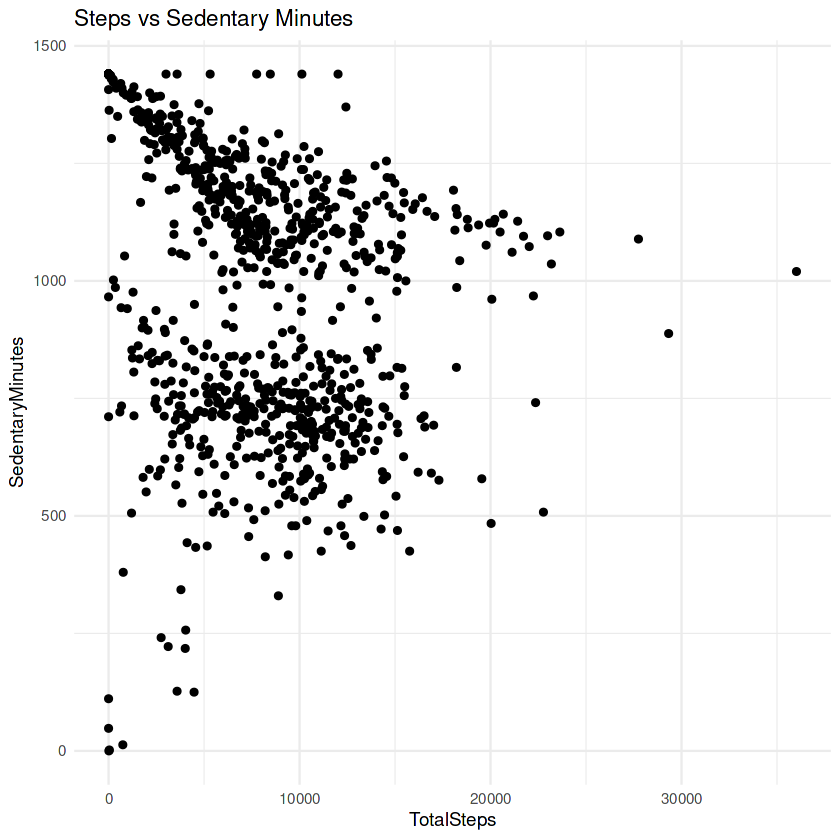

In [61]:
ggplot(data = dailyActivity, mapping = aes(x=TotalSteps, y=SedentaryMinutes))+
  geom_point()+ labs(title = "Steps vs Sedentary Minutes")+
  theme_minimal()

****What's the relationship between minutes asleep and time in bed?***

You might expect it to be almost completely linear - are there any unexpected trends?

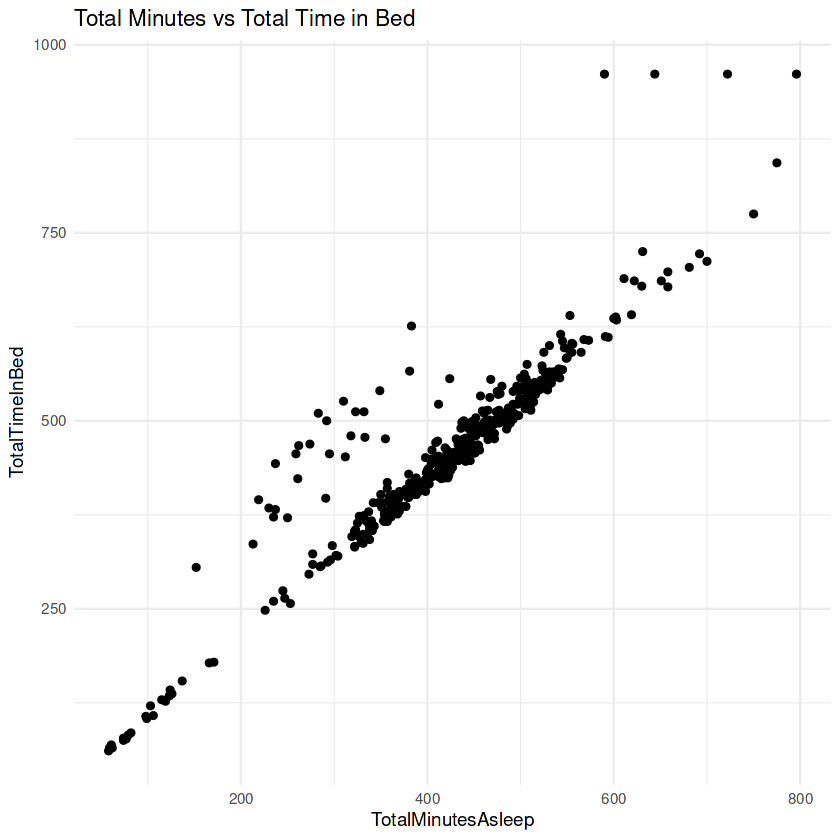

In [62]:
ggplot(data = sleepDay_merged, mapping = aes(x=TotalMinutesAsleep, y=TotalTimeInBed))+
  geom_point()+ labs(title = "Total Minutes vs Total Time in Bed") + 
  theme_minimal()

In [66]:
#combine data for more analysis

total_data <- merge(dailyActivity, sleepDay_merged, by="Id", all = TRUE)

View(total_data)

Id,ActivityDate,TotalSteps,TotalDistance,TrackerDistance,LoggedActivitiesDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,SedentaryActiveDistance,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,Calories,SleepDay,TotalSleepRecords,TotalMinutesAsleep,TotalTimeInBed
<dbl>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<dbl>,<dbl>,<dbl>
1503960366,5/7/2016,11992,7.71,7.71,0,2.46,2.12,3.13,0,37,46,175,833,1821,4/12/2016 12:00:00 AM,1,327,346
1503960366,5/7/2016,11992,7.71,7.71,0,2.46,2.12,3.13,0,37,46,175,833,1821,4/13/2016 12:00:00 AM,2,384,407
1503960366,5/7/2016,11992,7.71,7.71,0,2.46,2.12,3.13,0,37,46,175,833,1821,4/15/2016 12:00:00 AM,1,412,442
1503960366,5/7/2016,11992,7.71,7.71,0,2.46,2.12,3.13,0,37,46,175,833,1821,4/16/2016 12:00:00 AM,2,340,367
1503960366,5/7/2016,11992,7.71,7.71,0,2.46,2.12,3.13,0,37,46,175,833,1821,4/17/2016 12:00:00 AM,1,700,712
1503960366,5/7/2016,11992,7.71,7.71,0,2.46,2.12,3.13,0,37,46,175,833,1821,4/19/2016 12:00:00 AM,1,304,320
1503960366,5/7/2016,11992,7.71,7.71,0,2.46,2.12,3.13,0,37,46,175,833,1821,4/20/2016 12:00:00 AM,1,360,377
1503960366,5/7/2016,11992,7.71,7.71,0,2.46,2.12,3.13,0,37,46,175,833,1821,4/21/2016 12:00:00 AM,1,325,364
1503960366,5/7/2016,11992,7.71,7.71,0,2.46,2.12,3.13,0,37,46,175,833,1821,4/23/2016 12:00:00 AM,1,361,384


### Correlation


`geom_smooth()` using method = 'gam' and formula 'y ~ s(x, bs = "cs")'



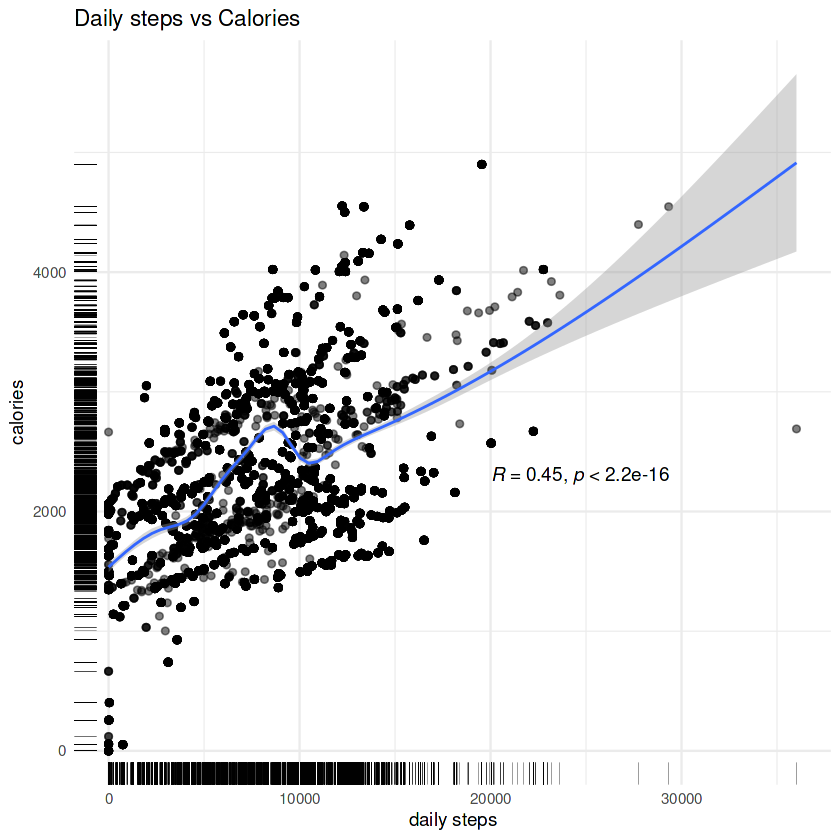

In [67]:
ggplot(data = total_data, mapping = aes(x=TotalSteps, y=Calories))+
  geom_jitter(alpha=0.5)+geom_rug(position = "jitter", size=.08)+
  geom_smooth(size=0.6)+
  stat_cor(method = "pearson", label.x = 20000, label.y = 2300)+
  labs(title = "Daily steps vs Calories", x="daily steps", y="calories")+
  theme_minimal()


**R=0.45**, indicating that the two variables are somewhat correlated to one another


`geom_smooth()` using method = 'gam' and formula 'y ~ s(x, bs = "cs")'

Warning message:
“Removed 227 rows containing non-finite values (stat_smooth).”
Warning message:
“Removed 227 rows containing non-finite values (stat_cor).”
Warning message:
“Removed 227 rows containing missing values (geom_point).”


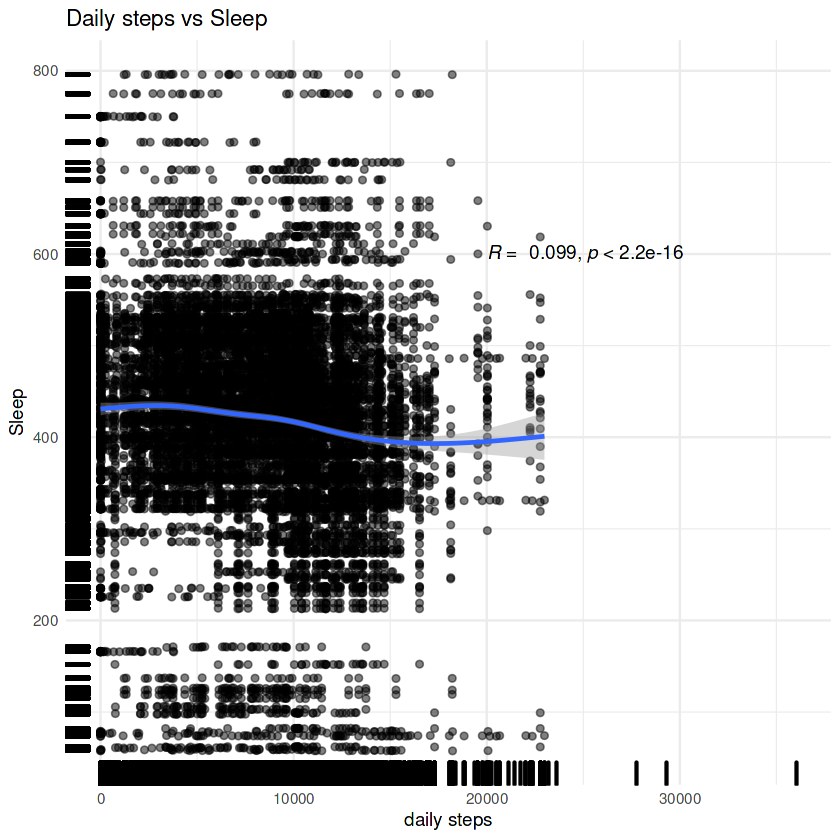

In [68]:
#steps vs. sleep  
ggplot(data = total_data, mapping = aes(x=TotalSteps, y=TotalMinutesAsleep))+
  geom_jitter(alpha=0.5)+geom_rug(position = "jitter", size=0.9)+
  geom_smooth(size=1)+
  stat_cor(method = "pearson", label.x = 20000, label.y = 600)+
  labs(title = "Daily steps vs Sleep", x="daily steps", y="Sleep")+
  theme_minimal()

**R= 0.099**, indicating little to no correlation between steps and amount of minutes users sleep per day.
